<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/Ejecicio_Casas_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Ejercicio Casas Repaso examn**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
df = pd.read_csv('sample_data/casasExamen.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Habitaciones,Baños,Estrato,Estado,Antigüedad,Piso N°,Administración,Precio m²,Tipo de apartamento,Parqueaderos,Precio,Área construída (m²),Área privada (m²)
0,0,0,3.0,2.0,3.0,Bueno,1 a 8 años,2.0,No definida,"$ 2.549.019,61*m²",NaN,NaN,130000000,51,0.0
1,1,1,2.0,1.0,2.0,Bueno,9 a 15 años,1.0,No definida,"$ 2.545.454,55*m²",NaN,NaN,112000000,44,44.0
2,2,2,3.0,1.0,3.0,Remodelado,1 a 8 años,6.0,No definida,"$ 2.142.857,14*m²",NaN,NaN,150000000,70,64.0
3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,No definida,NaN,NaN,NaN,152152000,NaN,NaN
4,4,4,3.0,1.0,3.0,Remodelado,9 a 15 años,6.0,No definida,"$ 1.785.714,29*m²",Loft,NaN,100000000,56,56.0


In [73]:
df.shape

(322, 15)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          322 non-null    int64  
 1   Unnamed: 0            322 non-null    int64  
 2   Habitaciones          241 non-null    float64
 3   Baños                 241 non-null    float64
 4   Estrato               241 non-null    float64
 5   Estado                181 non-null    object 
 6   Antigüedad            211 non-null    object 
 7   Piso N°               189 non-null    float64
 8   Administración        322 non-null    object 
 9   Precio m²             241 non-null    object 
 10  Tipo de apartamento   22 non-null     object 
 11  Parqueaderos          32 non-null     object 
 12  Precio                322 non-null    int64  
 13  Área construída (m²)  241 non-null    object 
 14  Área privada (m²)     241 non-null    float64
dtypes: float64(5), int64(3)

In [75]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Habitaciones,Baños,Estrato,Piso N°,Precio,Área privada (m²)
count,322.000000,322.000000,241.000000,241.000000,241.000000,189.000000,3.220000e+02,241.000000
mean,158.586957,158.586957,2.755187,1.385892,2.709544,3.312169,1.188918e+08,38.431535
std,92.954316,92.954316,0.458966,0.496286,0.561501,1.775396,2.428345e+07,22.276774
min,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,7.000000e+07,0.000000
25%,78.250000,78.250000,2.000000,1.000000,2.000000,2.000000,1.000000e+08,38.000000
50%,158.500000,158.500000,3.000000,1.000000,3.000000,3.000000,1.182500e+08,45.000000
75%,238.750000,238.750000,3.000000,2.000000,3.000000,5.000000,1.306250e+08,52.000000
max,319.000000,319.000000,4.000000,3.000000,3.000000,6.000000,2.300000e+08,80.000000


In [79]:
# Celda 4: Mostrar valores de las columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols.tolist())

for col in cat_cols:
    print(df[col].unique())
    print(df[col].value_counts(dropna=False))





['Estado', 'Antigüedad', 'Administración', 'Precio m²', 'Tipo de apartamento', 'Parqueaderos', 'Área construída (m²)']
['Bueno' 'Remodelado' nan 'Excelente']
Estado
NaN           141
Excelente      94
Bueno          69
Remodelado     18
Name: count, dtype: int64
['1 a 8 años' '9 a 15 años' nan '16 a 30 años' 'más de 30 años'
 'menor a 1 año']
Antigüedad
1 a 8 años        126
NaN               111
9 a 15 años        59
16 a 30 años       23
menor a 1 año       2
más de 30 años      1
Name: count, dtype: int64
['No definida']
Administración
No definida    322
Name: count, dtype: int64
['$ 2.549.019,61*m²' '$ 2.545.454,55*m²' '$ 2.142.857,14*m²' nan
 '$ 1.785.714,29*m²' '$ 1.975.000*m²' '$ 2.413.793,1*m²'
 '$ 1.923.076,92*m²' '$ 2.181.818,18*m²' '$ 2.500.000*m²'
 '$ 2.840.909,09*m²' '$ 2.363.636,36*m²' '$ 2.309.523,81*m²'
 '$ 2.011.613,44*m²' '$ 2.234.042,55*m²' '$ 2.285.714,29*m²'
 '$ 2.708.333,33*m²' '$ 2.253.521,13*m²' '$ 1.860.465,12*m²'
 '$ 2.275.862,07*m²' '$ 2.300.000*m²' '$ 3.382.

In [82]:
# borramos las columnas que no aportan informacion o tienen un valor unico
# celda 5 : Borrar las columnas que solo tengan un valor y las columnas con índices que no aportan información sobre los pisos

# columnas de indice creadas automaticamente
cols_indice = ["Unnamed: 0.1","Unnamed: 0"]

#columnas con valor unico
cols_un_valor = []
for col in df.columns:
  if df[col].nunique(dropna=False) == 1 and col != "Tipo de apartamento":
    cols_un_valor.append(col)
print("Columnas un valor unico" , cols_un_valor)
print("Columnas de indice: ", cols_indice)

#unimos lo que vamos a borrar
cols_borrar = cols_indice + cols_un_valor
print("Columnas a borrar: ", cols_borrar)

#eliminamos las columans
df =df.drop(columns = cols_borrar)

print("\nColumnas eliminadas", cols_borrar)
print(" columnas restantes")
print(df.columns.tolist())

Columnas un valor unico ['Administración']
Columnas de indice:  ['Unnamed: 0.1', 'Unnamed: 0']
Columnas a borrar:  ['Unnamed: 0.1', 'Unnamed: 0', 'Administración']

Columnas eliminadas ['Unnamed: 0.1', 'Unnamed: 0', 'Administración']
 columnas restantes
['Habitaciones', 'Baños', 'Estrato', 'Estado', 'Antigüedad', 'Piso N°', 'Precio m²', 'Tipo de apartamento', 'Parqueaderos', 'Precio', 'Área construída (m²)', 'Área privada (m²)']


In [84]:
# mostrar numero de valores faltantes por columna
faltantes = df.isnull().sum()
print(faltantes.sort_values(ascending=False))


Tipo de apartamento     300
Parqueaderos            290
Estado                  141
Piso N°                 133
Antigüedad              111
Estrato                  81
Habitaciones             81
Baños                    81
Precio m²                81
Área construída (m²)     81
Área privada (m²)        81
Precio                    0
dtype: int64


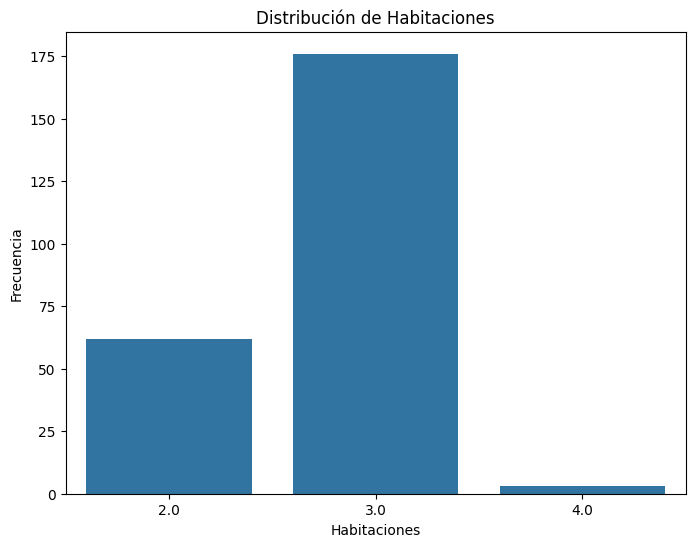

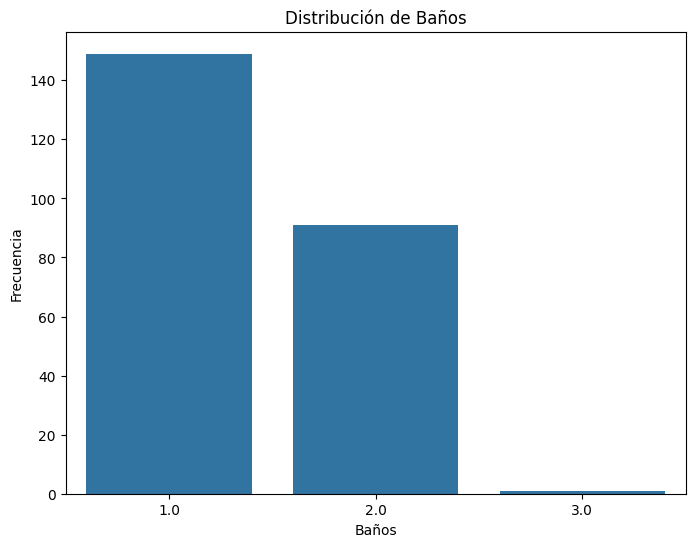

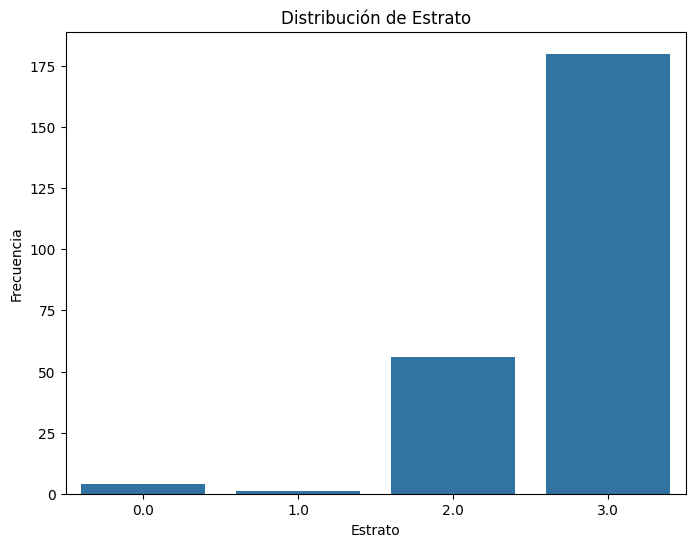

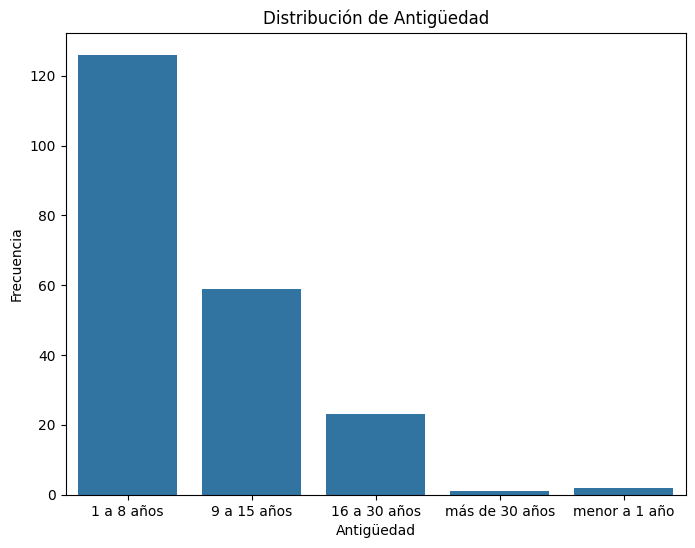

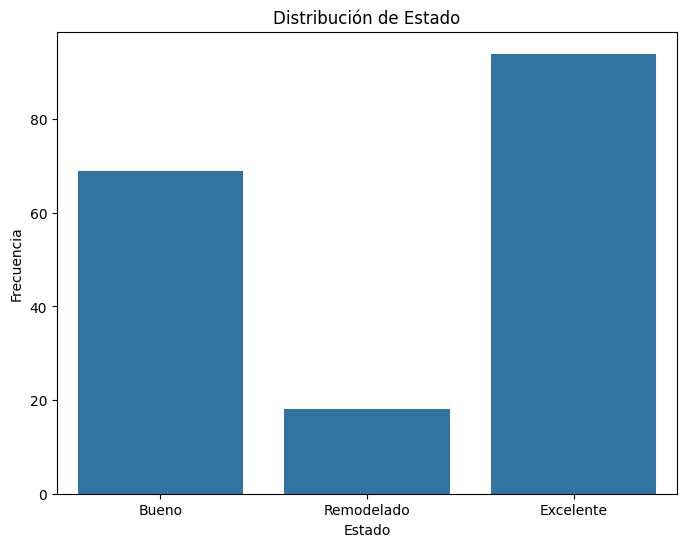

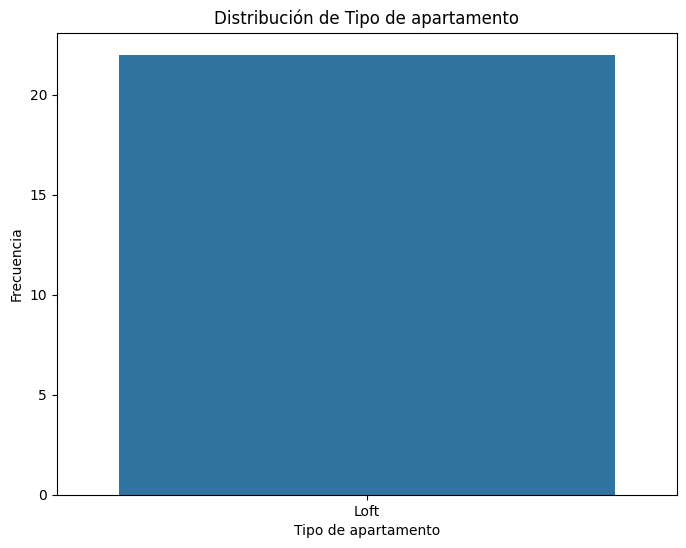

In [86]:
# representar diagrama de barras de las carateristicas habitaciones,baños,estrato,antigüedad,estado, tipo de apartamento

columnas_barras = ["Habitaciones", "Baños", "Estrato", "Antigüedad", "Estado", "Tipo de apartamento"]

#recorremos todas las columnas del array para pintarlas
for columna in columnas_barras:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
    else:
        print(f"La columna '{columna}' no está presente en el DataFrame.")

Text(0, 0.5, 'Frecuencia')

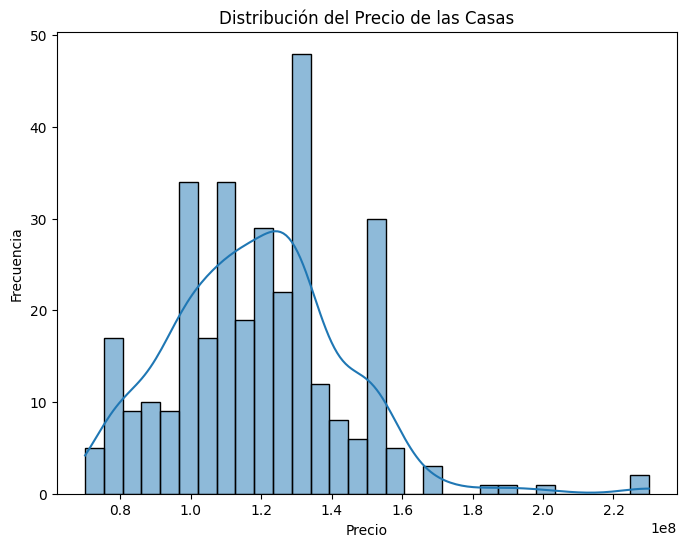

In [89]:
# representar el histograma del precio de las casas para ver la distribucion
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Precio', bins=30, kde=True)
plt.title('Distribución del Precio de las Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

In [96]:
#  funcion para modificar la columnas de Precio m2 para que tenga formato float
# Celda 9: Limpiar columna "Precio m²" sin usar try/except, tolerante a múltiples ejecuciones

# Convertimos a string SIEMPRE para evitar el error de .str cuando ya es float
df["Precio m²"] = df["Precio m²"].astype(str)

# Eliminamos símbolos no numéricos
df["Precio m²"] = df["Precio m²"].str.replace("$", "", regex=False)
df["Precio m²"] = df["Precio m²"].str.replace(" ", "", regex=False)
df["Precio m²"] = df["Precio m²"].str.replace("m²", "", regex=False)
df["Precio m²"] = df["Precio m²"].str.replace("m2", "", regex=False)
df["Precio m²"] = df["Precio m²"].str.replace("*", "", regex=False)
df["Precio m²"] = df["Precio m²"].str.replace(".", "", regex=False)   # elimina puntos de miles
df["Precio m²"] = df["Precio m²"].str.replace(",", ".", regex=False) # coma -> punto decimal

# Convertimos el resultado a float
df["Precio m²"] = pd.to_numeric(df["Precio m²"], errors="coerce")

df["Precio m²"].head()


,Precio m²
0,2.549020e+09
1,2.545455e+09
2,2.142857e+09
3,NaN
4,1.785714e+09


# Tratamiento de nulos


In [104]:
# comprobar si ha filas repetidas y si las hay borrarlas, antes de borrar guardar las filas duplicadas y mostrarlas

# buscamos filas repetidas
duplicadas = df.duplicated()
display(duplicadas)# Mostramos las filas duplicadas, no solo True/False
print(duplicadas.sum())

# guardamos las filas duplicadas en otro dataframe
df_duplicadas = duplicadas.copy()

#eliminar las filas duplicadas del dataframe principal
df = df.drop_duplicates()
print(df.shape)

print("\nTamaño del DataFrame después de eliminar duplicados:", df.shape)

,0
0,False
1,False
2,False
3,False
4,False
...,...
315,False
316,False
317,False
318,False


0
(204, 12)

Tamaño del DataFrame después de eliminar duplicados: (204, 12)


#2. Imputar los siguientes valores faltantes. Utilizar la clase SimpleImputer para rellenar los valores faltantes.
- a. A las variables Habitaciones, Baños, Estrato, Estado y Tipo de apartamento, con la moda de
su columna.
- b. A Área construida, y Área privada la rellenará con la media de su columna.
- c. A los faltantes de Antigüedad, ‘No definida’
- d. A la columna Parqueaderos y a Piso N° se asignará 0 a los faltantes.
- e. Crear un dataframe llamado nuevo con estos datos ya imputerizados y las columnas que faltan del dataset df.

In [105]:
# creamos un data frame llamado nuevo
nuevo = df.copy()
print(" nulos por columnas antes de imputar ")
print(nuevo.isna().sum())

 nulos por columnas antes de imputar 
Habitaciones             36
Baños                    36
Estrato                  36
Estado                   87
Antigüedad               54
Piso N°                  78
Precio m²                36
Tipo de apartamento     192
Parqueaderos            178
Precio                    0
Área construída (m²)     36
Área privada (m²)        36
dtype: int64


In [108]:
# imputar con la moda para habitaciones, baños, estrato,estado y tipod e apartamento

cols_moda= ["Habitaciones", "Baños", "Estrato", "Estado", "Tipo de apartamento"]

imputer_moda = SimpleImputer(strategy='most_frequent')

#aplicamos el imputador de moda a las columnas
nuevo[cols_moda]=imputer_moda.fit_transform(nuevo[cols_moda])

print("nulos por columnas despues de imputar")
print(nuevo[cols_moda].isna().sum())

nulos por columnas despues de imputar
Habitaciones           0
Baños                  0
Estrato                0
Estado                 0
Tipo de apartamento    0
dtype: int64


In [111]:
# Celda 11.3.a: Limpiar 'Área construída (m²)' y 'Área privada (m²)'
# para que sean realmente numéricas (float)

cols_media = ["Área construída (m²)", "Área privada (m²)"]

print("Tipos ANTES de limpiar:")
print(nuevo[cols_media].dtypes)
print("\nEjemplos de valores ANTES de limpiar:")
print(nuevo[cols_media].head())

# Recorremos cada columna y la limpiamos
for col in cols_media:
    # Convertimos todo a string para poder usar .str
    nuevo[col] = nuevo[col].astype(str)
    # Quitamos espacios
    nuevo[col] = nuevo[col].str.replace(" ", "", regex=False)
    # Cambiamos coma por punto decimal
    nuevo[col] = nuevo[col].str.replace(",", ".", regex=False)
    # Convertimos a numero por si algo raro aparece, se convierte en NaN
    nuevo[col] = pd.to_numeric(nuevo[col], errors="coerce")

print("\nTipos DESPUÉS de limpiar:")
print(nuevo[cols_media].dtypes)
print("\nEjemplos de valores DESPUÉS de limpiar:")
print(nuevo[cols_media].head())


Tipos ANTES de limpiar:
Área construída (m²)     object
Área privada (m²)       float64
dtype: object

Ejemplos de valores ANTES de limpiar:
  Área construída (m²)  Área privada (m²)
0                  51                 0.0
1                  44                44.0
2                  70                64.0
3                  NaN                NaN
4                  56                56.0

Tipos DESPUÉS de limpiar:
Área construída (m²)    float64
Área privada (m²)       float64
dtype: object

Ejemplos de valores DESPUÉS de limpiar:
   Área construída (m²)  Área privada (m²)
0                  51.0                0.0
1                  44.0               44.0
2                  70.0               64.0
3                   NaN                NaN
4                  56.0               56.0


In [112]:
# ahora ya limpiado si que imputamos con la media
cols_media=['Área construída (m²)', 'Área privada (m²)']
print("nulos por columnas despues de imputar")
print(nuevo[cols_media].isna().sum())

imputer_media = SimpleImputer(strategy='mean')
nuevo[cols_media] = imputer_media.fit_transform(nuevo[cols_media])

#nulos despues de imputar la media
print("nulos por columnas despues de imputar")
print(nuevo[cols_media].isna().sum())

nulos por columnas despues de imputar
Área construída (m²)    36
Área privada (m²)       36
dtype: int64
nulos por columnas despues de imputar
Área construída (m²)    0
Área privada (m²)       0
dtype: int64


In [116]:
# imputar A los faltantes de Antigüedad, ‘No definida’
cols_no_definido = ["Antigüedad"]
print("columnas que se imputaran con 'No definida': ",cols_no_definido)

imputer_no_definido = SimpleImputer(strategy='constant', fill_value='No definida')
nuevo[cols_no_definido] = imputer_no_definido.fit_transform(nuevo[cols_no_definido])

print("nulos por columnas despues de imputar")
print(nuevo[cols_no_definido].isna().sum())
print(nuevo["Antigüedad"].value_counts(dropna=False))

columnas que se imputaran con 'No definida':  ['Antigüedad']
nulos por columnas despues de imputar
Antigüedad    0
dtype: int64
Antigüedad
1 a 8 años        94
No definida       54
9 a 15 años       42
16 a 30 años      11
menor a 1 año      2
más de 30 años     1
Name: count, dtype: int64


In [113]:
# Imputar 0 en Parqueaderos y Piso N°

cols_cero = ["Parqueaderos", "Piso N°"]
print("columnas que se imputaran con 0: ",cols_cero)

imputer_cero = SimpleImputer(strategy='constant', fill_value=0)
nuevo[cols_cero] = imputer_cero.fit_transform(nuevo[cols_cero])

print("nulos por columnas despues de imputar")
print(nuevo[cols_cero].isna().sum())

columnas que se imputaran con 0:  ['Parqueaderos', 'Piso N°']
nulos por columnas despues de imputar
Parqueaderos    0
Piso N°         0
dtype: int64


In [117]:
# comprobacion de final de nulos en nuevo
print("nulos por columnas despues de imputar")
print(nuevo.isna().sum())

nulos por columnas despues de imputar
Habitaciones             0
Baños                    0
Estrato                  0
Estado                   0
Antigüedad               0
Piso N°                  0
Precio m²               36
Tipo de apartamento      0
Parqueaderos             0
Precio                   0
Área construída (m²)     0
Área privada (m²)        0
dtype: int64


# Tratamiento de  outliers (3 puntos)

Columans numericas ['Precio m²', 'Precio', 'Área construída (m²)', 'Área privada (m²)']


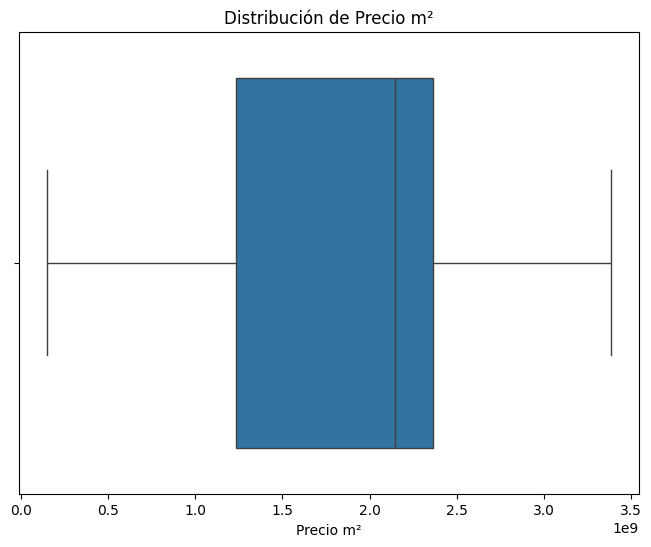

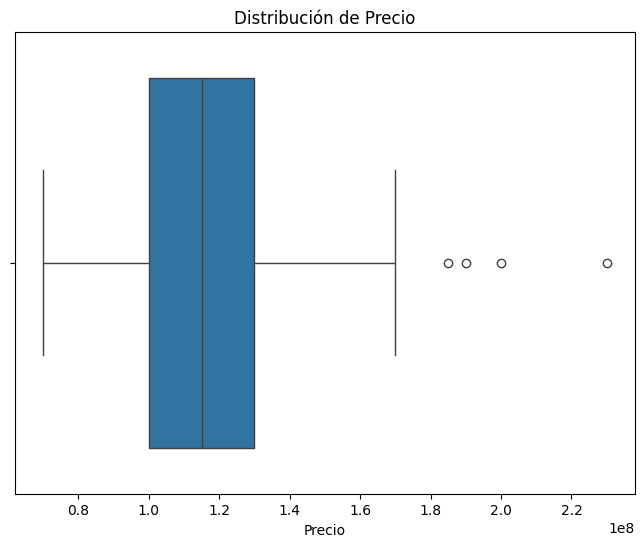

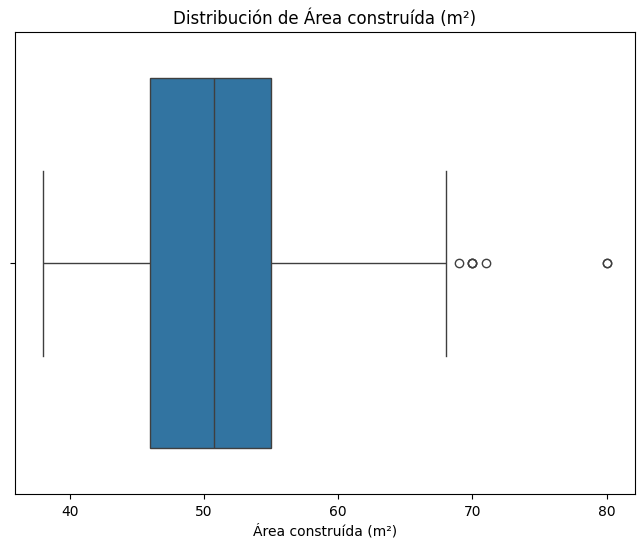

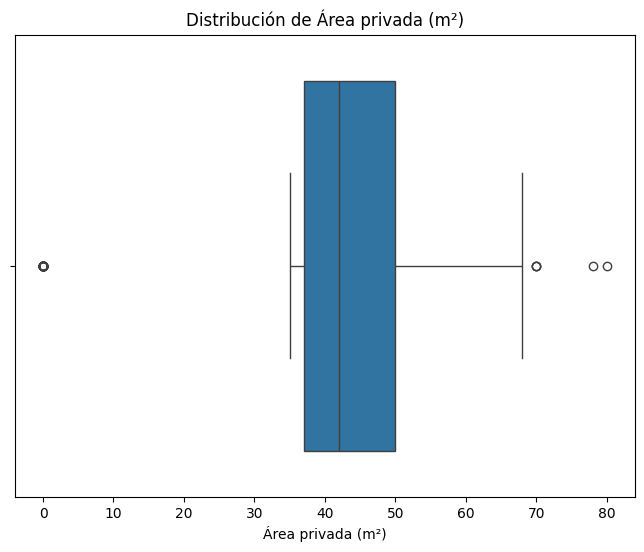

In [121]:
# comprobar outliers en la columnas numericas. buscar outliers fuertes

# seleccionamos solo las columnas numericas deldataframe nuevo
num_cols = nuevo.select_dtypes(include=['float64', 'int64']).columns

print("Columans numericas", list(num_cols))
# recorremos las columnas para dibujarlas
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=nuevo, x=col)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)

In [124]:
# Detectarlos y borrar las filas. Utilizar rango intercuartílico. Indicar las filas donde se han encontrado.
# detectar outliers usandod IQR y eliminar filas

# calculo de Q1,Q3 e IQR para todas las numericas
Q1 = nuevo[num_cols].quantile(0.25)
Q3 = nuevo[num_cols].quantile(0.75)
IQR = Q3 - Q1

#establecemos limites inferior y superior
lim_inf = Q1 -1.5 * IQR
lim_sup = Q3 +1.5 * IQR

# boleano para true si la fila tiene outlier en alguna columna numerica
mask_outliers = (nuevo[num_cols] < lim_inf) | (nuevo[num_cols]> lim_sup)

# filas con al menos un outliers
filas_outliers = mask_outliers.any(axis=1)

# indice de outlier
indices_outliers = nuevo[filas_outliers].index
print("indice con outlier detectados")
print(indices_outliers.tolist())

# data fram sin outliers
nuevo_sin_outliers = nuevo[~filas_outliers].reset_index(drop=True)
print("\nTamaño original de 'nuevo':", nuevo.shape)
print("filas sin outliers", nuevo_sin_outliers.shape)

indice con outlier detectados
[0, 2, 7, 9, 11, 20, 21, 23, 24, 25, 33, 85, 88, 92, 94, 104, 105, 107, 109, 113, 121, 122, 126, 144, 152, 156, 157, 158, 178, 179, 180, 202, 215, 220, 224, 231, 232, 235, 242, 244, 253, 256, 270, 273, 276, 282, 284, 288, 295, 297, 299, 318, 319]

Tamaño original de 'nuevo': (204, 12)
filas sin outliers (151, 12)


#Codificar las columnas:

In [126]:
# Separar las columnas categóricas y numéricas
df_cod = nuevo_sin_outliers.copy()
cat_cols = df_cod.select_dtypes(include=['object']).columns
num_cols = df_cod.select_dtypes(include=['float64', 'int64']).columns

print("Columnas categoricas", cat_cols)
print("Columnas numericas", num_cols)

Columnas categoricas Index(['Habitaciones', 'Baños', 'Estrato', 'Estado', 'Antigüedad', 'Piso N°',
       'Tipo de apartamento', 'Parqueaderos'],
      dtype='object')
Columnas numericas Index(['Precio m²', 'Precio', 'Área construída (m²)', 'Área privada (m²)'], dtype='object')


In [128]:
# Celda 14.1bis: Convertir todas las columnas categóricas a string
# para evitar errores de OneHotEncoder por mezcla de tipos como en la columnas de años de antiguedas

for col in cat_cols:
    df_cod[col] = df_cod[col].astype(str)

print("Conversión de categóricas a string completada.")


Conversión de categóricas a string completada.


In [129]:
# aplicar onehotencoder solo a las categoricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#transformamos las categoricas
encoded_cat = encoder.fit_transform(df_cod[cat_cols])
# lo pasamos a dataframe
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols), index = df_cod.index)

#unimos con las numericas para cntinuar
df_encoded = pd.concat([df_cod[num_cols], encoded_cat_df], axis=1)
print("Tamaño despues de OneHotEncoder")
print(df_encoded.shape)
df_encoded.head()


Tamaño despues de OneHotEncoder
(151, 30)


,Precio m²,Precio,Área construída (m²),Área privada (m²),Habitaciones_2.0,Habitaciones_3.0,Habitaciones_4.0,Baños_1.0,Baños_2.0,Estrato_2.0,...,Piso N°_1.0,Piso N°_2.0,Piso N°_3.0,Piso N°_4.0,Piso N°_5.0,Piso N°_6.0,Tipo de apartamento_Loft,Parqueaderos_0,Parqueaderos_1,Parqueaderos_Más de 10
0,2.545455e+09,112000000,44.000000,44.000000,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,NaN,152152000,50.703155,37.011905,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.785714e+09,100000000,56.000000,56.000000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.975000e+08,79000000,40.000000,40.000000,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,NaN,130625000,50.703155,37.011905,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Aprendizaje supervisado:
-  Revisa la relación entre precio y las variables del dataset. Crea un dataset diferente con ellas.
- Justifica qué modelo de regresión utilizarías y por qué
- Divide los datos en datos de entrenamiento (80%) y datos de test(20%) y aplica el modelo
- ¿Cuál es el valor de R2?

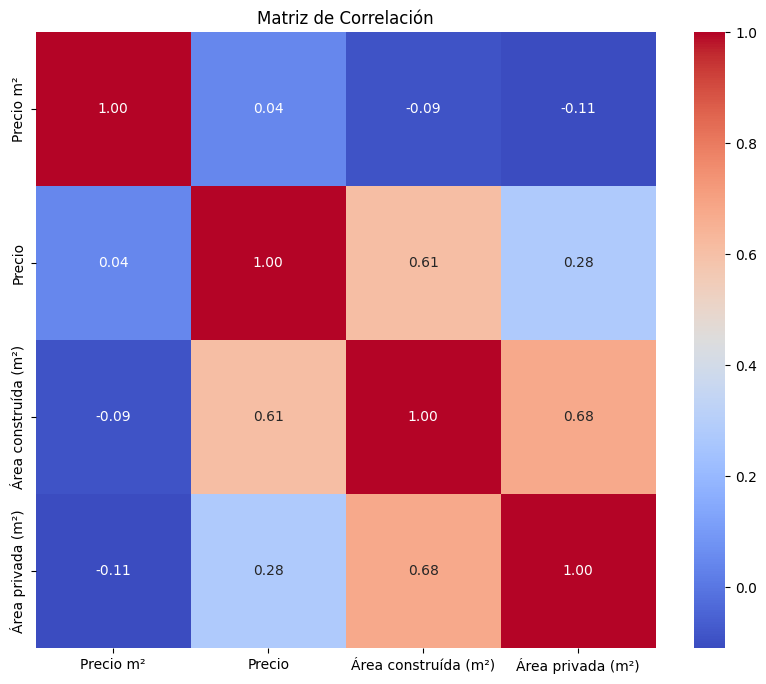

In [130]:
# Matriz de correlación solo de variables numéricas
# agregamos la columna de precio como referencia
df_corr = nuevo_sin_outliers.copy()
corr_matrix = df_corr.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [134]:
# Separar datos en entrenamiento (80%) y test (20%)
# variable objetivo
y = df_encoded["Precio"]

# variables predictorias
X= df_encoded.drop(columns=["Precio","Precio m²"])
# division en train , test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (120, 28)
Tamaño de y_train: (120,)
Tamaño de X_test: (31, 28)
Tamaño de y_test: (31,)


In [135]:
# entrenar un modelo de regresion lilneal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [136]:
# Evaluar el modelo con R²

# prediccion sobre datos de test
y_pred = modelo.predict(X_test)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Valor de r2: ",r2)

Valor de r2:  0.19707617967239077


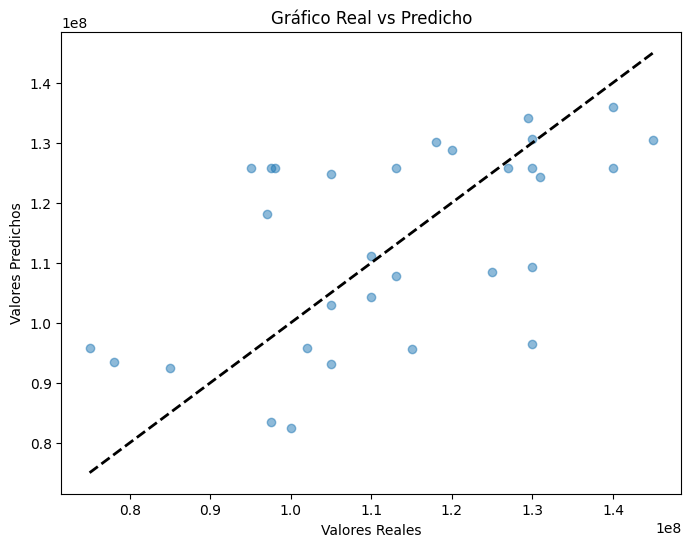

In [137]:
#Gráfico Real vs Predicho para evaluar la regresión

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico Real vs Predicho')
plt.show()